# <b>Objectives<b>
Perform EDA on different attribute and ML model development to gather insight from 'Online Retail' dataset

# <b>Import required Packeges<b>

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# <b>Load Dataset<b>

In [282]:
retail_data = pd.read_excel(r"C:\Users\Administrator\Desktop\Dream with python\COURSERA\Online Retail.xlsx")
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [283]:
print(f"Total No of Rows are ={retail_data.shape[0]} and Columns = {retail_data.shape[1]}")

Total No of Rows are =541909 and Columns = 8


In [284]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [285]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# <b>Data Wrangling<b>

In [286]:
retail_data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<b>Handling Missing Value<b>

In [287]:
def plot_missing_column(retail_data: pd.DataFrame):
    if retail_data.isnull().sum().sum() != 0:
        na_retail_data = (retail_data.isnull().sum() / len(retail_data)) * 100      
        na_retail_data = na_retail_data.drop(na_retail_data[na_retail_data == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_retail_data})
        plt.figure(figsize=(10, 6))
        missing_data.plot(kind="bar")
        for i in plt.gca().patches:
            height, width = i.get_height(), i.get_x() + i.get_width()/2
            plt.annotate(f'{height:.2f}%', (width, height), ha='center', va='bottom')
        plt.title('Percentage of Missing data in Dataset\'s Attribute')
        plt.xticks(rotation=0)
        plt.show()
    else:
        print('No missing value in this coloumn')

<Figure size 1000x600 with 0 Axes>

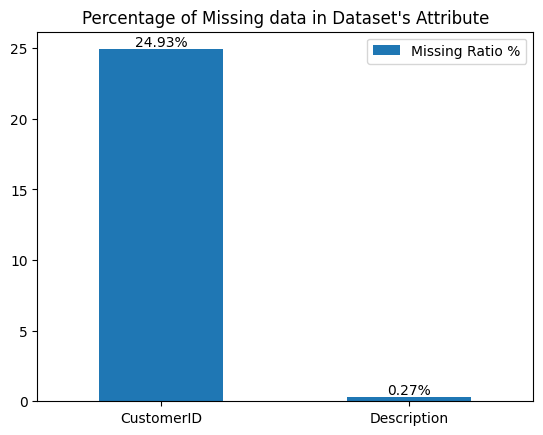

In [288]:
plot_missing_column(retail_data)

In [289]:
retail_data.dropna(inplace=True)

<b>Handling Duplicated Value<b>

In [290]:
retail_data.duplicated().sum()

5225

In [291]:
retail_data.drop_duplicates(inplace=True)

<b>Check Negative Value<b>

In [292]:
print('Total negative value in Quantity =',(retail_data['Quantity']<0).sum())
print('Total negative value in Quantity =',(retail_data['UnitPrice']<0).sum())

Total negative value in Quantity = 8872
Total negative value in Quantity = 0


<b>Make Negative to Positive Value because 'Quantity' can't be negative<b>

In [293]:
retail_data['Quantity'] = retail_data['Quantity'].abs()

<b>Handling Datetime object<b>

In [294]:
retail_data['Year'] = pd.to_datetime(retail_data["InvoiceDate"]).dt.year


retail_data["Month"] = pd.to_datetime(retail_data["InvoiceDate"]).dt.month
retail_data['Month Name according to Year'] = pd.to_datetime(retail_data["InvoiceDate"]).dt.month_name()
retail_data['Weekday'] = pd.to_datetime(retail_data["InvoiceDate"]).dt.weekday
retail_data['Day'] = pd.to_datetime(retail_data["InvoiceDate"]).dt.day
retail_data["Day Name"] = pd.to_datetime(retail_data["InvoiceDate"]).dt.day_name()

In [295]:
retail_data['Time'] = pd.to_datetime(retail_data['InvoiceDate']).dt.hour
retail_data['Time of Day'] = ['Early Morning'if x < 6 else ('Morning' if x < 12 else ('Noon' if x < 14 else ('Afternoon' if x < 18 else ('Evening' if x < 22 else 'Night')))) for x in retail_data['Time']]

In [296]:
#retail_data['Time'] = pd.to_datetime(retail_data['InvoiceDate']).dt.hour
#retail_data['Time of Day'] = ['Early Morning' if x < 6 
                             #else ('Morning' if x < 12 
                             #else ('Noon' if x < 14 
                             #else ('Afternoon' if x < 18 
                             #else ('Evening' if x < 22 else 'Night'))))
                             #for x in retail_data['Time']]

<b>Calculate Total Sales Revenue<b>

In [297]:
retail_data['Total Sales'] = retail_data['UnitPrice'] * retail_data['Quantity']

In [298]:
retail_data['Total Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total Sales, dtype: float64

In [299]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Month Name according to Year,Weekday,Day,Day Name,Time,Time of Day,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,2,1,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,2,1,Wednesday,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,2,1,Wednesday,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,2,1,Wednesday,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,2,1,Wednesday,8,Morning,20.34


In [300]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month',
       'Month Name according to Year', 'Weekday', 'Day', 'Day Name', 'Time',
       'Time of Day', 'Total Sales'],
      dtype='object')

# <b>EDA<b>

In [386]:
sns.set_theme(style='whitegrid')

Text(0.5, 1.0, 'Sales in Time of Day')

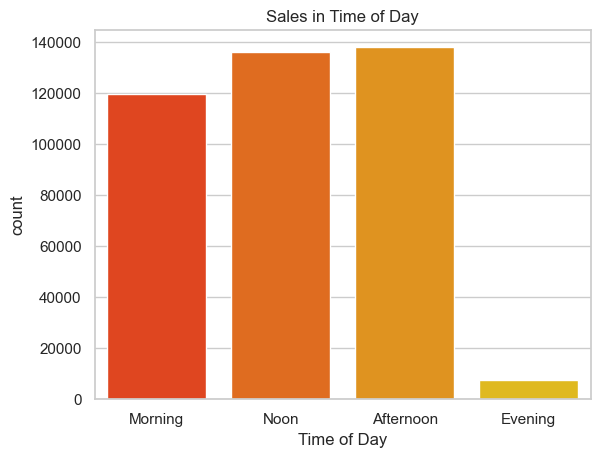

In [387]:
sns.countplot(data=retail_data,x='Time of Day',hue='Time of Day',palette='autumn',legend=False)
plt.title('Sales in Time of Day')

Text(0.5, 1.0, 'Sales in Week Day')

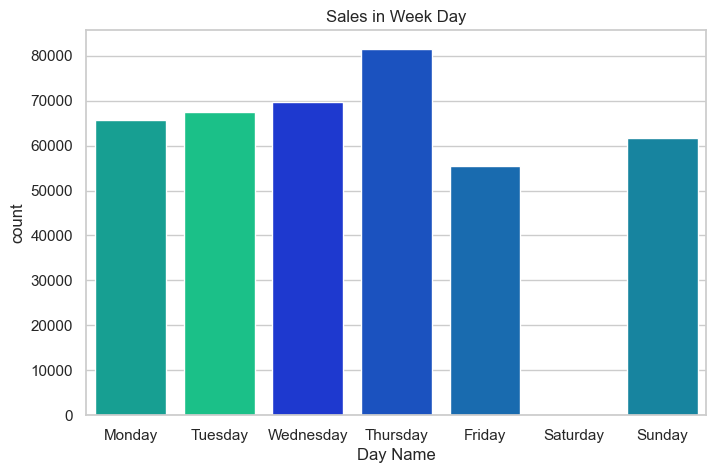

In [391]:
plt.figure(figsize=(8,5))
orders=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=retail_data,x='Day Name',hue='Day Name',order=orders,palette='winter',legend=False)
plt.title('Sales in Week Day')

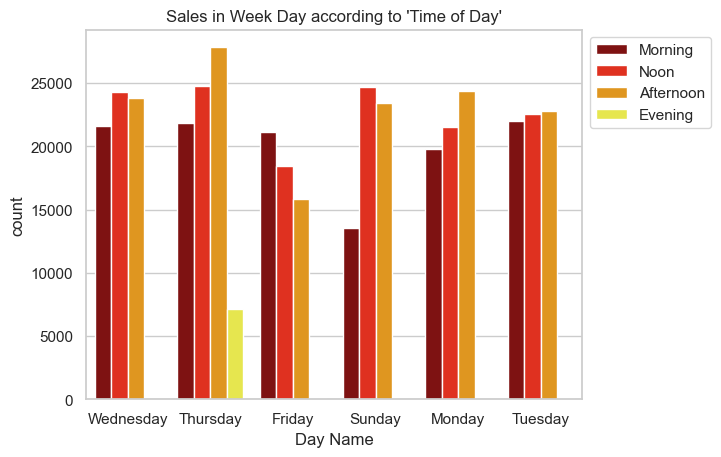

In [361]:
sns.countplot(data=retail_data,x='Day Name',hue='Time of Day',palette='hot')
plt.title('Sales in Week Day according to \'Time of Day\'')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

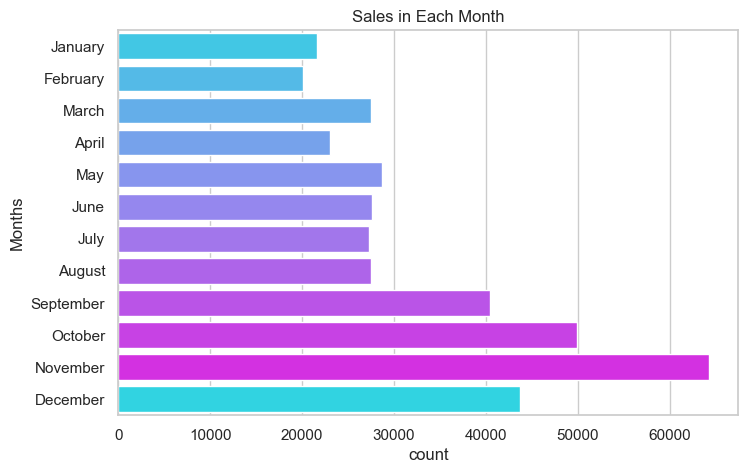

In [362]:
import calendar
plt.figure(figsize=(8,5))
month_order = list(calendar.month_name)[1:]
sns.countplot(data=retail_data, y='Month Name according to Year', order=month_order, hue='Month Name according to Year', palette='cool', legend=False)
plt.title('Sales in Each Month')
plt.ylabel('Months')
plt.show()


<Axes: xlabel='Year', ylabel='Total Sales'>

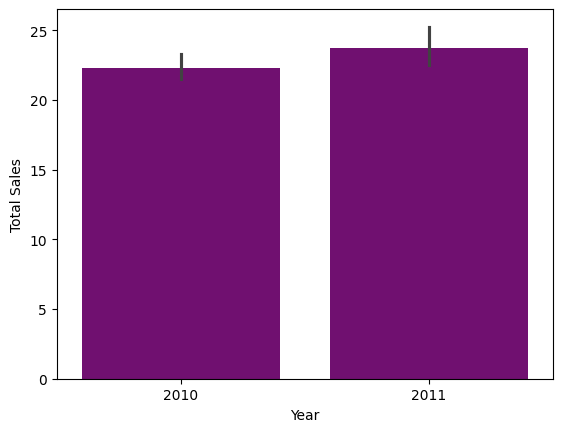

In [306]:
sns.barplot(data=retail_data,x='Year',y='Total Sales',color="purple")

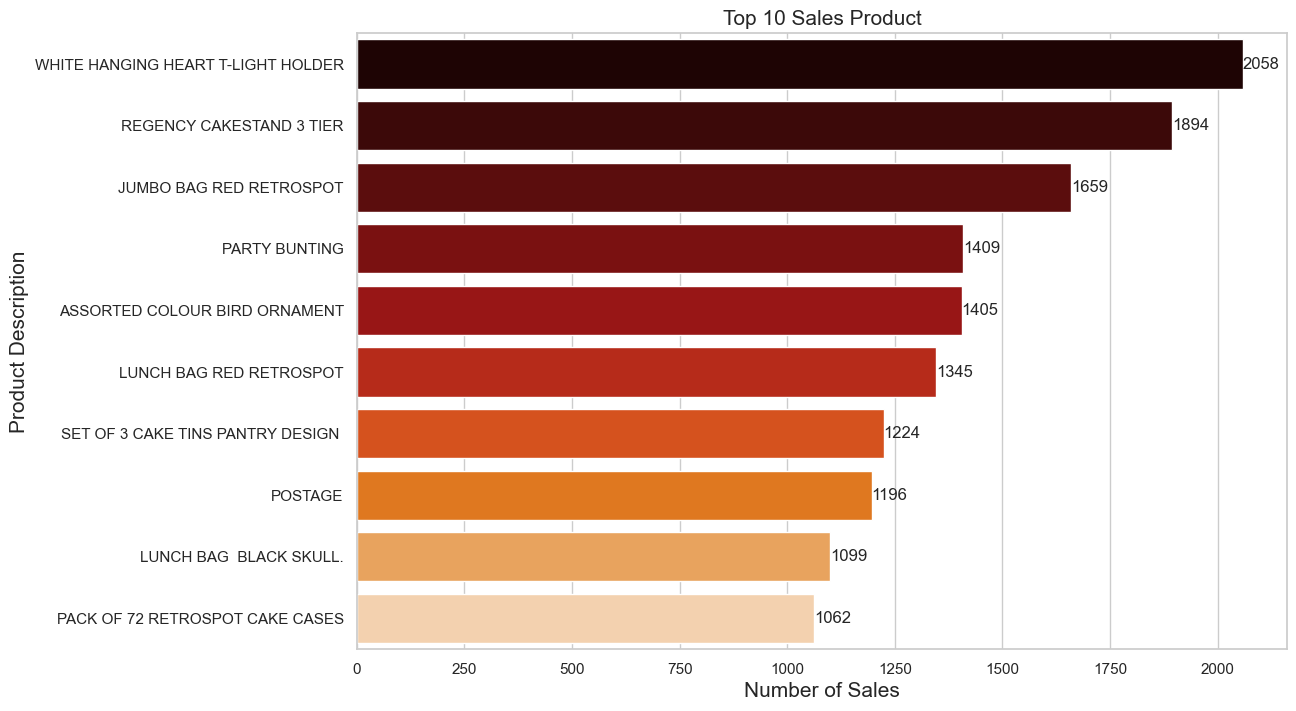

In [366]:
top_10_sales_Product = retail_data['Description'].value_counts().sort_values(ascending=False)
top_10_sales_Product = top_10_sales_Product.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_sales_Product.values, y=top_10_sales_Product.index,hue=top_10_sales_Product.index, palette='gist_heat', legend=False)
plt.xlabel('Number of Sales',fontsize=15)
plt.ylabel('Product Description',fontsize=15)
plt.title('Top 10 Sales Product',fontsize=15)
for i, value in enumerate(top_10_sales_Product.values):
    plt.text(value, i, f'{value}', ha='left', va='center')
plt.show()

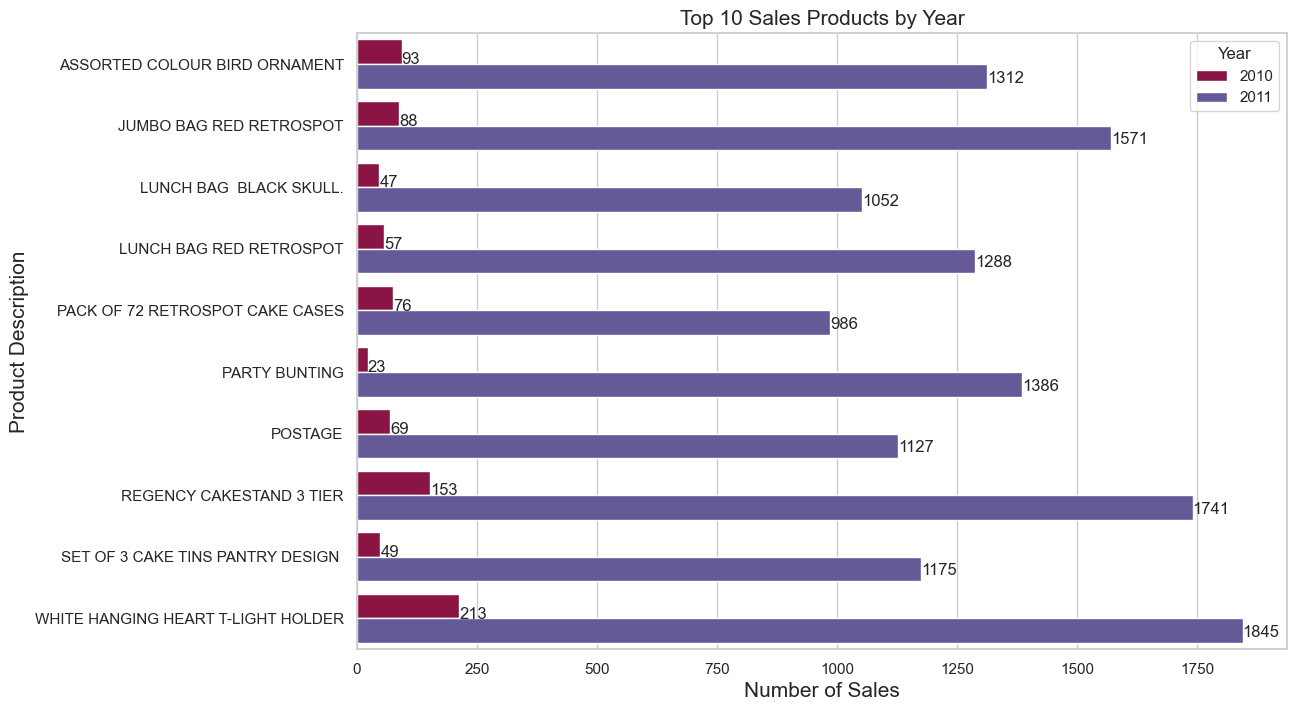

In [381]:
sales_product_by_year = retail_data.groupby(['Description', 'Year']).size().reset_index(name='Sales by Year')
top_10_products = sales_product_by_year.groupby('Description')['Sales by Year'].sum().nlargest(10).index
top_10_sales_data = sales_product_by_year[sales_product_by_year['Description'].isin(top_10_products)]
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_sales_data, x='Sales by Year', y='Description', hue='Year',palette='Spectral')
plt.xlabel('Number of Sales', fontsize=15)
plt.ylabel('Product Description', fontsize=15)
plt.title('Top 10 Sales Products by Year', fontsize=15)
for i, year in enumerate(top_10_sales_data['Year'].unique()):
    for j, value in enumerate(top_10_sales_data[top_10_sales_data['Year'] == year]['Sales by Year']):
        plt.text(value, j + i * 0.3, f'{value}', ha='left', va='baseline')
plt.show()


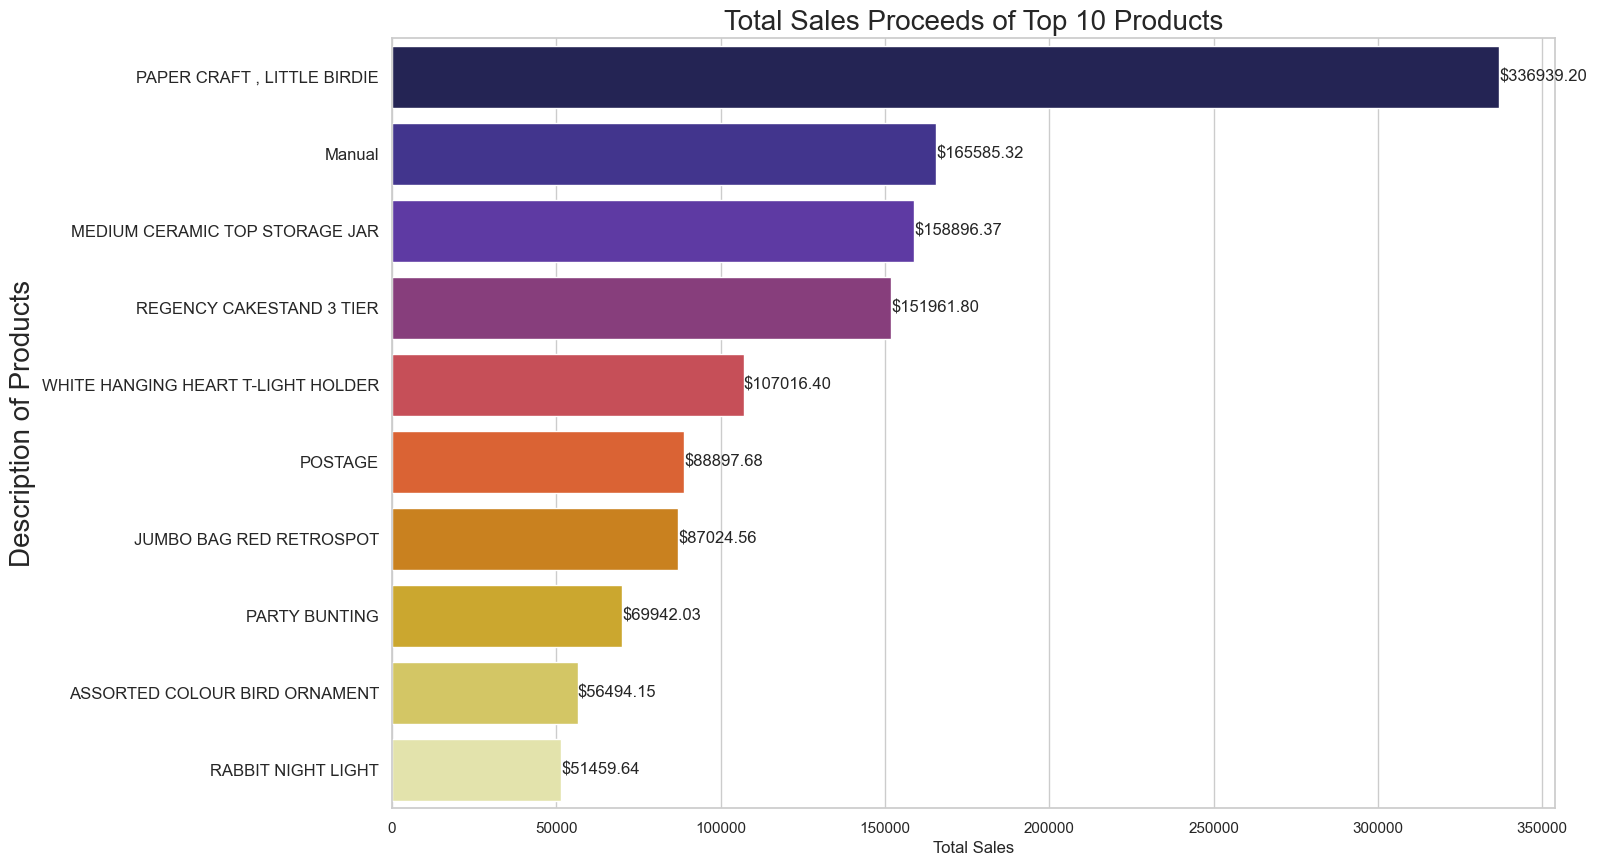

In [379]:
plt.figure(figsize=(15, 10))
top10sales = retail_data.groupby('Description')['Total Sales'].sum().sort_values(ascending=False)
top_10_sales_Product = top10sales.head(10).sort_values(ascending=False)
sns.barplot(data=top_10_sales_Product.reset_index(), x='Total Sales', y='Description',hue='Description',palette='CMRmap', legend=False)
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Description of Products', fontsize=20)
plt.title('Total Sales Proceeds of Top 10 Products', fontsize=20)
plt.yticks(fontsize=12)
plt.show()


Text(0.5, 1.0, 'Most time products ordered by top 10 Countries')

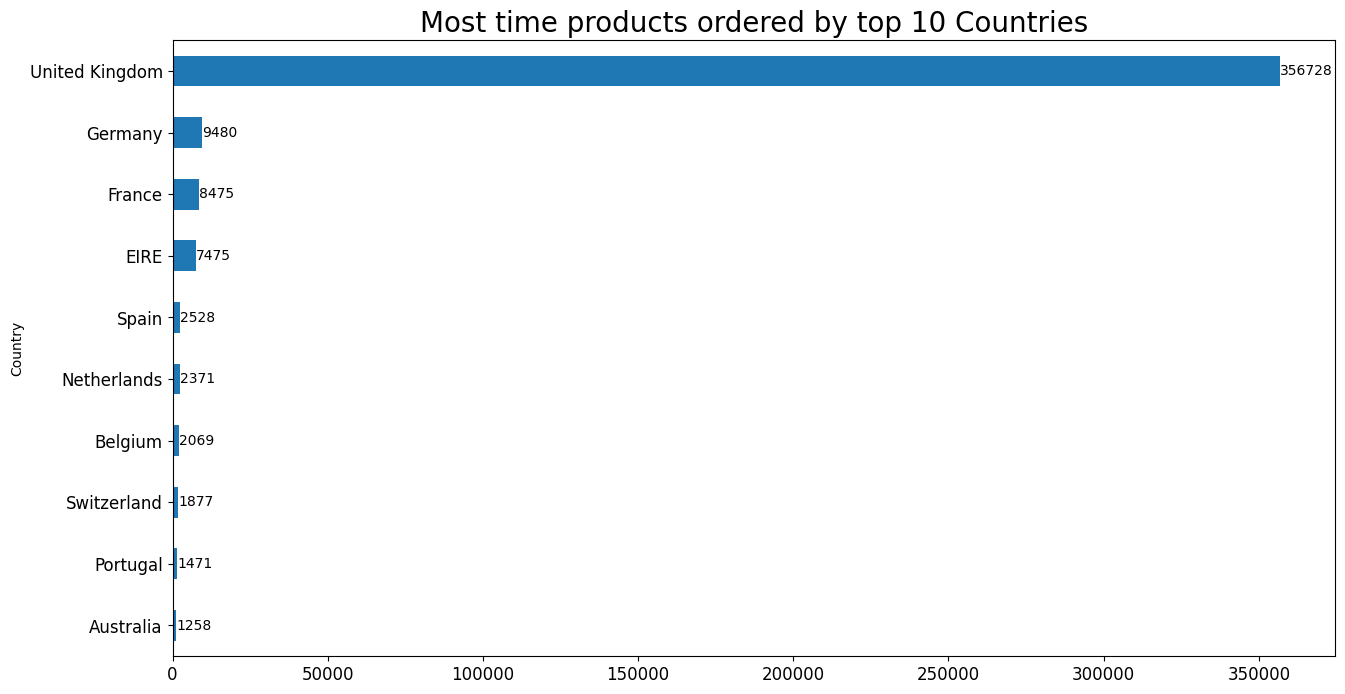

In [311]:
plt.figure(figsize=(15,8))
top_countries = retail_data['Country'].value_counts().nlargest(10)
top_countries_sorted = top_countries.sort_values(ascending=True)
top_countries_sorted.plot(kind='barh', fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.title('Most time products ordered by top 10 Countries',fontsize=20)

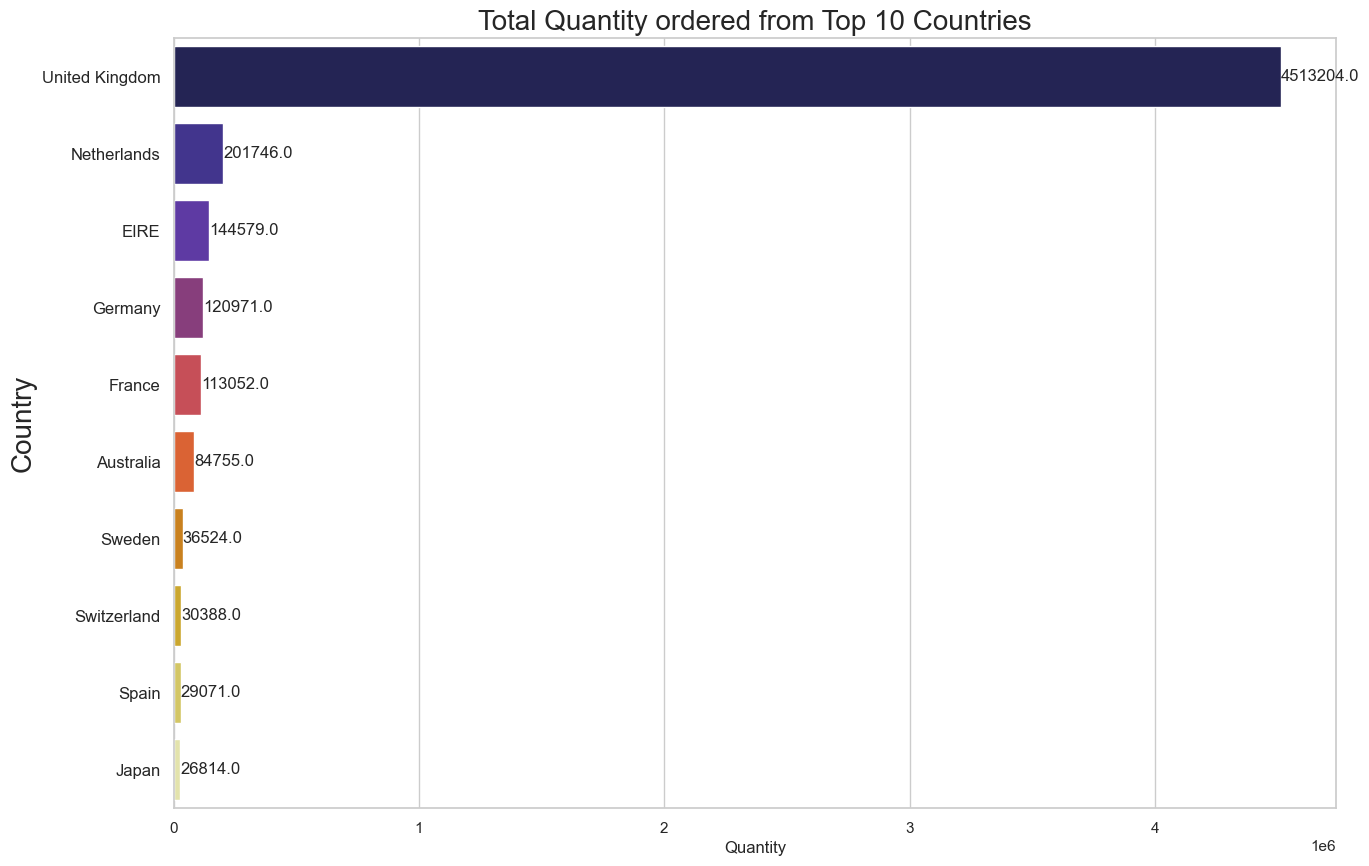

In [384]:
plt.figure(figsize=(15, 10))
top10sales = retail_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
top_10_sales_Product = top10sales.head(10).sort_values(ascending=False)
sns.barplot(data=top_10_sales_Product.reset_index(), x='Quantity', y='Country',hue='Country',palette='CMRmap', legend=False)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Country',fontsize=20)
plt.title('Total Quantity ordered from Top 10 Countries',fontsize=20)
plt.yticks(fontsize=12)
plt.show()


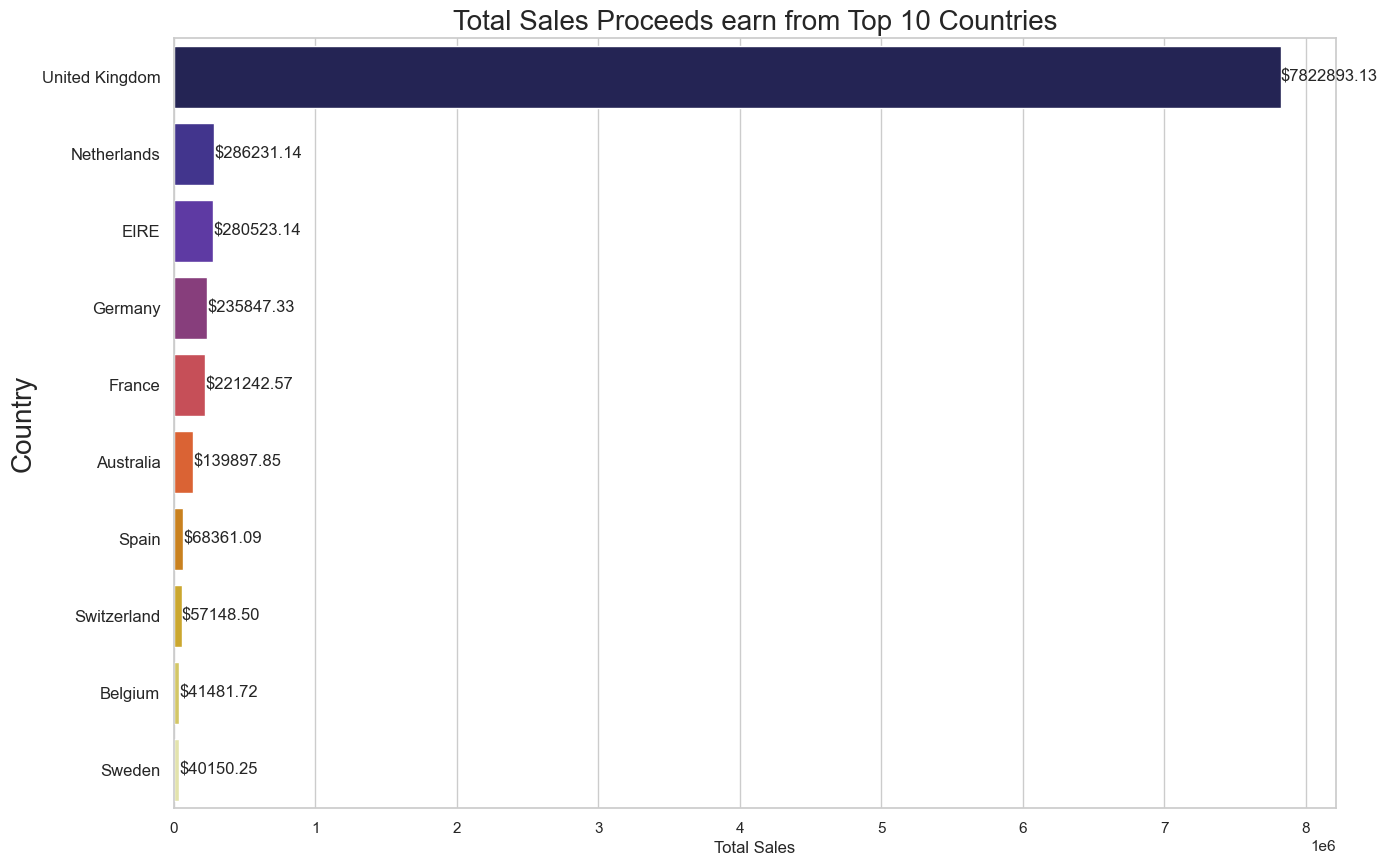

In [385]:
plt.figure(figsize=(15, 10))
top10sales = retail_data.groupby('Country')['Total Sales'].sum().sort_values(ascending=False)
top_10_sales_Product = top10sales.head(10).sort_values(ascending=False)
sns.barplot(data=top_10_sales_Product.reset_index(), x='Total Sales', y='Country',hue='Country',palette='CMRmap', legend=False)
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.ylabel('Country',fontsize=20)
plt.title('Total Sales Proceeds earn from Top 10 Countries',fontsize=20)
plt.yticks(fontsize=12)
plt.show()


# <b>Model Development & Evaluation<b>

In [314]:
X=retail_data[['Quantity','UnitPrice']]
Y = retail_data['Total Sales']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [315]:
regr = LinearRegression()
regr.fit (x_train,y_train)

LinearRegression()

In [316]:
y_hat = regr.predict(x_test)
LinearRegression_R2 = r2_score(y_test , y_hat)
LinearRegression_MAE = mean_absolute_error(y_test , y_hat)
LinearRegression_MSE = mean_squared_error(y_test , y_hat)

In [317]:
value = {'Algorithm':'LinearRegression' ,'R2':LinearRegression_R2,'MAE':LinearRegression_MAE,'MSE':LinearRegression_MSE}
report = pd.DataFrame([value])
report

,Algorithm,R2,MAE,MSE
0,LinearRegression,0.844412,12.292662,3827.062413
